In [1]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies_df = pd.read_csv('./ml-25m/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Loading in the ratings dataset
ratings_df = pd.read_csv('./ml-25m/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
movies_df.columns = ['MovieID', 'Title', 'Genres']
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
temp =ratings_df.sort_values(["UserID"], ascending=True)
temp

,UserID,MovieID,Rating,Timestamp
0,1,296,5.0,1147880044
50,1,7820,2.5,1147878050
49,1,7365,4.0,1147869033
48,1,7361,5.0,1147880055
47,1,7327,3.5,1147868855
...,...,...,...,...
24999974,162541,1274,4.0,1240950326
24999975,162541,1275,4.5,1240952554
24999976,162541,1293,4.0,1240947397
24999978,162541,1321,2.5,1240950870


In [7]:
ratings_df = ratings_df.iloc[:2500000, :]
len(ratings_df)

2500000

In [8]:
user_rating_df = ratings_df.pivot(index='UserID', columns='MovieID', values='Rating')
user_rating_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,208789,208793,208795,208800,208939,209049,209053,209055,209103,209163
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:5]

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.7, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.6, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ]])

In [10]:
hiddenUnits = 20
visibleUnits =  len(user_rating_df.columns)

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Number of features we're going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [11]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [13]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (29661,)
v1 state shape:   (29661,)


In [14]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.4973197


Epoch: 1 batch #: 0  of 33 sample #: 499 reconstruction error: 0.001087
Epoch: 1 batch #: 1  of 33 sample #: 499 reconstruction error: 0.007081
Epoch: 1 batch #: 2  of 33 sample #: 499 reconstruction error: 0.001222
Epoch: 1 batch #: 3  of 33 sample #: 499 reconstruction error: 0.000820
Epoch: 1 batch #: 4  of 33 sample #: 499 reconstruction error: 0.013620
Epoch: 1 batch #: 5  of 33 sample #: 499 reconstruction error: 0.001184
Epoch: 1 batch #: 6  of 33 sample #: 499 reconstruction error: 0.001432
Epoch: 1 batch #: 7  of 33 sample #: 499 reconstruction error: 0.001246
Epoch: 1 batch #: 8  of 33 sample #: 499 reconstruction error: 0.003579
Epoch: 1 batch #: 9  of 33 sample #: 499 reconstruction error: 0.000978
Epoch: 1 batch #: 10  of 33 sample #: 499 reconstruction error: 0.001060
Epoch: 1 batch #: 11  of 33 sample #: 499 reconstruction error: 0.017788
Epoch: 1 batch #: 12  of 33 sample #: 499 reconstruction error: 0.000674
Epoch: 1 batch #: 13  of 33 sample #: 499 reconstruction erro

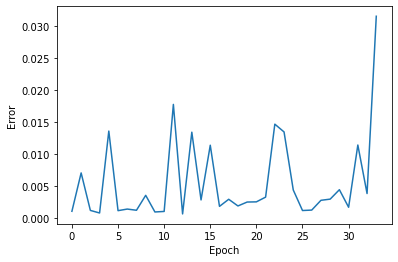

In [16]:
epochs = 1
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)

v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [17]:
mock_user_id = 1


In [18]:
#Selecting the input user
inputUser = trX[mock_user_id-1].reshape(1, -1)

inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser

print(v0)
v0.shape

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(29661,), dtype=float32)


TensorShape([29661])

In [19]:
v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape

TensorShape([29661])

In [20]:
#Feeding in the user and reconstructing the input

hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)

vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)

rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor(
[2.6793672e-02 2.2028154e-02 1.2140007e-03 ... 5.4893267e-06 7.6349224e-06
 3.7915174e-06], shape=(29661,), dtype=float32)


In [21]:
scored_movies_df_mock = movies_df[movies_df['MovieID'].isin(user_rating_df.columns)]
scored_movies_df_mock = scored_movies_df_mock.assign(RecommendationScore = rec[0])
scored_movies_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,MovieID,Title,Genres,RecommendationScore
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0.909532
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.658744
7236,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,0.605275
4867,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,0.590802
1175,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,0.469391
4122,4226,Memento (2000),Mystery|Thriller,0.427419
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.422645
1225,1258,"Shining, The (1980)",Horror,0.410344
585,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0.391224
4742,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,0.391095


In [22]:
movies_df_mock = ratings_df[ratings_df['UserID'] == mock_user_id]
movies_df_mock.head()

,UserID,MovieID,Rating,Timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [23]:
#Merging movies_df with ratings_df by MovieID
merged_df_mock = scored_movies_df_mock.merge(movies_df_mock, on='MovieID', how='outer')

In [24]:
merged_df = scored_movies_df_mock.merge(ratings_df, on="MovieID", how="outer")
merged_df

,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.026794,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.026794,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.026794,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.026794,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.026794,8,4.0,890492517
...,...,...,...,...,...,...,...
2499995,209049,No Safe Spaces (2019),Documentary,0.000008,14059,4.5,1573965319
2499996,209053,Bowling (2012),Comedy,0.000011,15152,3.5,1574007700
2499997,209055,"Very Well, Thank You (2007)",Comedy|Drama,0.000005,15152,3.5,1574007770
2499998,209103,Tsar Ivan the Terrible (1991),(no genres listed),0.000008,13737,4.0,1574112239


In [25]:
merged_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)


,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0.909532,1.0,5.0,1.147880e+09
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.658744,NaN,NaN,NaN
7083,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,0.605275,1.0,5.0,1.147880e+09
4798,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,0.590802,1.0,4.5,1.147869e+09
1171,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,0.469391,NaN,NaN,NaN
4060,4226,Memento (2000),Mystery|Thriller,0.427419,NaN,NaN,NaN
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.422645,NaN,NaN,NaN
1221,1258,"Shining, The (1980)",Horror,0.410344,NaN,NaN,NaN
584,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0.391224,NaN,NaN,NaN
4674,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,0.391095,NaN,NaN,NaN


In [26]:
merged_df_mock.shape

(29661, 7)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
merged_df_mock_train = merged_df_mock.dropna()

In [29]:
merged_df_mock_train.shape

(70, 7)

In [30]:
merged_df = merged_df.dropna()


In [32]:
X = merged_df['RecommendationScore'].values.reshape(-1, 1)
y = merged_df['Rating'].values

In [33]:
# train linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [34]:
merged_df_mock_test = merged_df_mock

In [35]:
merged_df_mock_test

,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.026794,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.022028,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,0.001214,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.000201,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,0.000856,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29656,209049,No Safe Spaces (2019),Documentary,0.000008,NaN,NaN,NaN
29657,209053,Bowling (2012),Comedy,0.000011,NaN,NaN,NaN
29658,209055,"Very Well, Thank You (2007)",Comedy|Drama,0.000005,NaN,NaN,NaN
29659,209103,Tsar Ivan the Terrible (1991),(no genres listed),0.000008,NaN,NaN,NaN


In [36]:
merged_df_mock_test["PredictedRating"]=model.predict(merged_df_mock_test[["RecommendationScore"]])

/Users/aryuska/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
merged_df_mock_test.sort_values(["RecommendationScore"], ascending=False).head(50)

,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp,PredictedRating
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0.909532,1.0,5.0,1.147880e+09,5.097616
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.658744,NaN,NaN,NaN,4.652607
7083,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,0.605275,1.0,5.0,1.147880e+09,4.557731
4798,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,0.590802,1.0,4.5,1.147869e+09,4.532049
1171,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,0.469391,NaN,NaN,NaN,4.316613
4060,4226,Memento (2000),Mystery|Thriller,0.427419,NaN,NaN,NaN,4.242135
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.422645,NaN,NaN,NaN,4.233663
1221,1258,"Shining, The (1980)",Horror,0.410344,NaN,NaN,NaN,4.211836
584,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0.391224,NaN,NaN,NaN,4.177909
4674,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,0.391095,NaN,NaN,NaN,4.177680


In [86]:
merged_df_mock_test2 = merged_df_mock

In [87]:
merged_df_mock_test2["PredictedRating"] = (merged_df_mock_test2['Rating'] * merged_df_mock_test2['RecommendationScore']).sum() / merged_df_mock_test2['RecommendationScore'].sum()

In [88]:
merged_df_mock_test2

,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp,PredictedRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.048941,26.0,3.0,1.280516e+09,0.769691
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.061159,NaN,NaN,NaN,0.769691
2,3,Grumpier Old Men (1995),Comedy|Romance,0.006271,NaN,NaN,NaN,0.769691
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.000392,NaN,NaN,NaN,0.769691
4,5,Father of the Bride Part II (1995),Comedy,0.001910,NaN,NaN,NaN,0.769691
...,...,...,...,...,...,...,...,...
21947,208002,The Kill Team (2019),Drama|War,0.000058,NaN,NaN,NaN,0.769691
21948,208080,Bruja (2019),Drama|Fantasy|Thriller,0.000022,NaN,NaN,NaN,0.769691
21949,208737,Midway (2019),Action|Drama|War,0.000140,NaN,NaN,NaN,0.769691
21950,208793,Watchman (2019),Drama|Thriller,0.000029,NaN,NaN,NaN,0.769691
